# Mean_var_std

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
calculate=np.array([0,1,2,3,4,5,6,7,8])
if len(calculate)<9:
    print("List must contains nine numbers")
else:
    a=np.reshape(calculate,(3,3))
    print("Mean:",np.mean(a,axis=0),np.mean(a,axis=1),np.mean(a))
    print("Varience:",np.var(a,axis=0),np.var(a,axis=1),np.var(a))
    print("Standard Deviation:",np.std(a,axis=0),np.std(a,axis=1),np.std(a))
    print("Max:",np.max(a,axis=0),np.max(a,axis=1),np.max(a))
    print("Min:",np.min(a,axis=0),np.min(a,axis=1),np.min(a))
    print("Sum:",np.sum(a,axis=0),np.min(a,axis=1),np.sum(a))

Mean: [3. 4. 5.] [1. 4. 7.] 4.0
Varience: [6. 6. 6.] [0.66666667 0.66666667 0.66666667] 6.666666666666667
Standard Deviation: [2.44948974 2.44948974 2.44948974] [0.81649658 0.81649658 0.81649658] 2.581988897471611
Max: [6 7 8] [2 5 8] 8
Min: [0 1 2] [0 3 6] 0
Sum: [ 9 12 15] [0 3 6] 36


# Demographic_data_analyzer

In [10]:
df=pd.DataFrame({
    'age':[39,50,38,53,28],
    'Work Class':[
        'State-gov',
        'Self-emp-not-inc',
        'Private',
        'Private',
        'Private'
    ],
    'fnlwgt':[
        77516,
        83311,
        215646,
        234721,
        338409
    ],
    'education':[
        'Bachelors',
        'Bachelors',
        'HS-grade',
        '11th',
        'Bachelors'
    ],
    'education-num':[13,13,9,7,13],
    'material-status':[
        'Never-married',
        'Married-civ-spouse',
        'Divorced',
        'Married-civ-spouse',
        'Married-civ-spouse'
    ],
    'occupation':[
        'Adm-clerical',
        'Exec-managerial',
        'Handlers-cleaners',
        'Handlers-cleaners',
        'Prof-specialty'
    ],
    'relationship':[
        'Not-in-family',
        'Husband',
        'Not-in-family',
        'Husband',
        'Wife'
    ],
    'race':[
        'White',
        'White',
        'White',
        'Black',
        'Black'
    ],
    'sex':[
        'Male',
        'Male',
        'Male',
        'Male',
        'Female'
    ],
    'capital-gain':[2174,0,0,0,0],
    'capital-loss':[0,0,0,0,0],
    'hours-per-week':[40,13,40,40,40],
    'native-country':[
        'United-States',
        'United-States',
        'United-States',
        'United-States',
        'Cuba'
    ],
    'Salary':[
        '<=50K',
        '<=50K',
        '<=50K',
        '<=50K',
        '<=50K',
    ]
},columns=['age','Work Class','fnlwgt','education','education-num','material-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary'])

In [11]:
df

,age,Work Class,fnlwgt,education,education-num,material-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grade,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
#How many people of each race are represented in this dataset?
racecount=df.groupby('race')
racecount['race'].count()

race
Black    2
White    3
Name: race, dtype: int64

In [17]:
#What is the average age of men?
avg_age_men=df[df['sex']=='Male']['age'].mean()
avg_age_men

45.0

In [34]:
#What is the percentage of people who have a Bachelor's degree?
percentage_bachelor=df[df['education']=='Bachelors'].shape[0]/df.shape[0]*100
percentage_bachelor

60.0

In [36]:
#What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
lower_education = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
higher_education
lower_education

,age,Work Class,fnlwgt,education,education-num,material-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
2,38,Private,215646,HS-grade,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [39]:
#What percentage of people without advanced education make more than 50K?
higher_education_rich = higher_education[higher_education['Salary'] == '>50K']['Salary'].count() / higher_education.shape[0] * 100
lower_education_rich = lower_education[lower_education['Salary'] == '<50K']['Salary'].count() / lower_education.shape[0] * 100
higher_education_rich
lower_education_rich

0.0

In [40]:
#What is the minimum number of hours a person works per week?
min_work_hours = df['hours-per-week'].min()
min_work_hours

13

In [44]:
#What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
num_min_workers = df[df['hours-per-week'] == 1]['hours-per-week'].count()
rich_percentage = df[(df['hours-per-week'] == 1) & (df['Salary'] == '>50K')].shape[0] / num_min_workers
num_min_workers
rich_percentage

C:\Users\thani\AppData\Local\Temp/ipykernel_16648/1223993542.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  rich_percentage = df[(df['hours-per-week'] == 1) & (df['Salary'] == '>50K')].shape[0] / num_min_workers


nan

In [46]:
# What country has the highest percentage of people that earn >50K?
highest_earning_country = df[df['Salary'] == '>50K'].groupby('native-country')['native-country'].count().max()
highest_earning_country_percentage = (highest_earning_country / df.groupby('native-country')['native-country'].count()).max()
highest_earning_country
highest_earning_country_percentage

nan

In [48]:
# Identify the most popular occupation for those who earn >50K in India.
top_IN_occupation = df[(df['native-country'] == 'India') & (df['Salary'] == '>50K')].groupby('occupation')['occupation'].count().max()
top_IN_occupation

nan

# medical_data_visualizer

In [60]:
df=pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


We add the 'overweight' column, where we set values 0 or 1, if the pacient is not overweight (0) or if it is overweight (1). It looks in the following way.

In [62]:
height2Meters = (df['height']/100)*(df['height']/100)
IMC = df['weight'] / height2Meters 
df.loc[IMC <= 25, 'overweight'] = 0 
df.loc[IMC > 25, 'overweight'] = 1 
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56,100,60,1,1,0,0,0,0,0.0


We also normalize the values of Cholesterol and Glucosa.

In [63]:
df.loc[df['cholesterol']==1, 'cholesterol'] = 0 
df.loc[df['cholesterol']>1, 'cholesterol'] = 1 
df.loc[df['gluc']==1, 'gluc'] = 0 
df.loc[df['gluc']>1, 'gluc'] = 1

Now we will prepare the data frame in a long format, to plot by the different variables (diseases).

In [64]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

The count plot by different diseases for two different cardio values is the following:

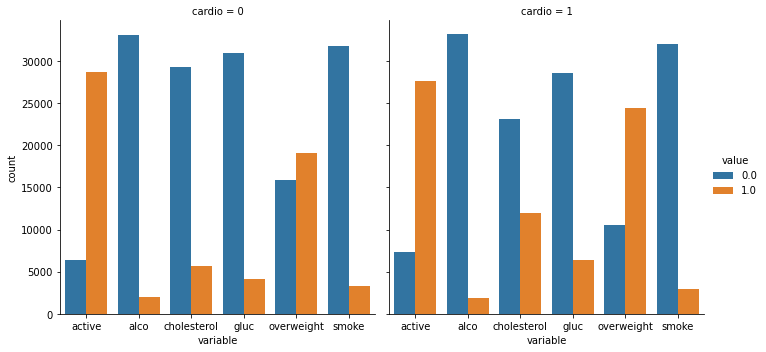

In [65]:
sns.catplot(x='variable',col='cardio',hue='value',kind='count',data=df_cat)

We see that the most of the diseases are strongly correlated with 'heart disease' (cardio). Where Cholesterol and overweight the most dramatic cases. Now we will filter wrong data, especially those cases where the 'high value of blood pressure' is lower than the 'low value of blood pressure'. We also filter the height and weight values which are over the 97.5% and the data and below the 2.5% of the values, in order to avoid possible wrong data.

In [66]:
df_filtered = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] < df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] < df['weight'].quantile(0.975))]

With this filtered data frame we create a correlation matrix, that gives the connection between differnet deseases.

In [67]:
Corr = df_filtered.corr()

Finally, we crate a heatmap whit the correlation matrix, that shows numerically which are the most correlated deseases.

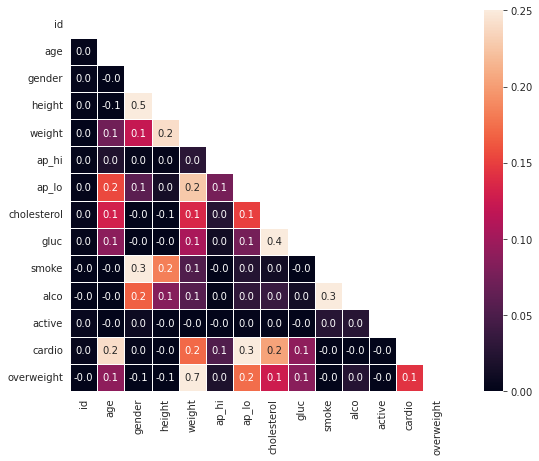

In [68]:
mask = np.zeros_like(Corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, fig = plt.subplots(figsize=(12, 7))
    fig = sns.heatmap(Corr,vmin=0,vmax=.25,square=True,annot=True,linewidths=.5,fmt=".1f",mask=mask)


As we spect, the most correlated variables are: weight - overweight, gender - smoke, cholesterol - glucosa and gender - height.

# Page View Time Series Visualizer

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df = df.set_index('date')
# Clean data
df = df[
    (df['value'] >= (df['value'].quantile(0.025))) & 
    (df['value'] <= (df['value'].quantile(0.975)))   
    ]
df.index = pd.to_datetime(df.index)


def draw_line_plot():
    
# Draw line plot
    fig = plt.figure(figsize=(6, 3))
    plt.plot(df.index, df['value'])
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot

    # Draw bar plot

    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    cbar = df_bar.groupby([df.index.year, df.index.month],)['value'].agg(np.mean).rename_axis(['year', 'month'])
    cbar = cbar.reset_index()

    df_pivtab = pd.pivot_table(cbar,
    values = 'value',
    index = 'year',
    columns = 'month')
    ax = df_pivtab.plot(kind='bar')
    fig = ax.get_figure()
    fig.set_size_inches(2,2)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title = 'Months')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    fig,axis = plt.subplots(1,2)
    fig.set_size_inches(4,2)
    sns.boxplot(x = df_box['year'], y = df_box['value'], ax = axis[0]).set(xlabel='Year', ylabel='Page Views')
    sns.boxplot(x = df_box['month'], y = df_box['value'], 
        order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'], 
        ax = axis[1]).set(xlabel='Month', ylabel='Page Views')
    axis[0].set_title('Year-wise Box Plot (Trend)')
    axis[1].set_title('Month-wise Box Plot (Seasonality)')




    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


# Sea Level Predictor

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
    lineA = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    xA = np.arange(df['Year'].min(),2050,1)
    yA = xA*lineA.slope + lineA.intercept

    plt.plot(xA,yA)

    # Create second line of best fit
    df_2000 = df[df['Year'] >= 2000]

    lineB = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
    xB = np.arange(2000,2050,1)
    yB = xB*lineB.slope + lineB.intercept

    plt.plot(xB,yB)

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()